<a href="https://colab.research.google.com/github/nikenoctaa/Estimation-of-Email-Spam-Classification/blob/master/Estimation_of_email_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
from plotly import tools
import plotly.figure_factory as ff

import nltk
import re
import string
import os


In [315]:
data = pd.read_csv("spam_ham_dataset.csv")

In [316]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


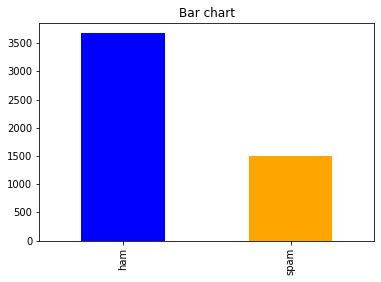

In [317]:
count_Class=pd.value_counts(data["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

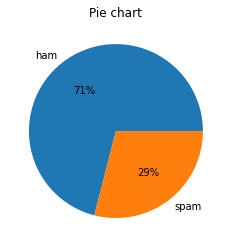

In [318]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [319]:
data.drop(['Unnamed: 0', 'label_num'],axis=1,inplace=True)

In [320]:
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [321]:
data.text[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [322]:
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '_TemplateMetaclass',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [323]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [324]:
def remove_punctuation(text):
    new_text=''.join([char for char in text if char not in string.punctuation])
    return new_text

In [325]:
data['new_text']=data['text'].apply(lambda row : remove_punctuation(row))

In [326]:
data.head()

,label,text,new_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...


In [327]:
data.new_text[0]

'Subject enron methanol  meter   988291\r\nthis is a follow up to the note i gave you on monday  4  3  00  preliminary\r\nflow data provided by daren  \r\nplease override pop  s daily volume  presently zero  to reflect daily\r\nactivity you can obtain from gas control \r\nthis change is needed asap for economics purposes '

In [328]:
print(data.text[0])
data.new_text[0]

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


'Subject enron methanol  meter   988291\r\nthis is a follow up to the note i gave you on monday  4  3  00  preliminary\r\nflow data provided by daren  \r\nplease override pop  s daily volume  presently zero  to reflect daily\r\nactivity you can obtain from gas control \r\nthis change is needed asap for economics purposes '

In [329]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 

In [330]:
data['tokenized_text']=data['new_text'].apply(lambda row : tokenize(row.lower()))
data.head()

,label,text,new_text,tokenized_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,..."


In [331]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
#stopwords[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [332]:
def remove_stopwords(text):
    clean_text=[word for word in text if word not in stopwords]
    return clean_text 

In [333]:
data['clean_text']=data['tokenized_text'].apply(lambda row : remove_stopwords(row))
data.head()

,label,text,new_text,tokenized_text,clean_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this...","[subject, enron, methanol, meter, 988291, foll..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see...","[subject, hpl, nom, january, 9, 2001, see, att..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,...","[subject, indian, springs, deal, book, teco, p..."


In [334]:
bannedWord = ['subject']
def remove_bannedWord(clean_text):
    fix_text=[word for word in clean_text if word not in bannedWord]
    return fix_text 
data['fix_text']=data['clean_text'].apply(lambda row : remove_bannedWord(row))

In [335]:
data.head()

,label,text,new_text,tokenized_text,clean_text,fix_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this...","[subject, enron, methanol, meter, 988291, foll...","[enron, methanol, meter, 988291, follow, note,..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see...","[subject, hpl, nom, january, 9, 2001, see, att...","[hpl, nom, january, 9, 2001, see, attached, fi..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a...","[subject, neon, retreat, ho, ho, ho, around, w...","[neon, retreat, ho, ho, ho, around, wonderful,..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[photoshop, windows, office, cheap, main, tren..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,...","[subject, indian, springs, deal, book, teco, p...","[indian, springs, deal, book, teco, pvr, reven..."


In [336]:
ps = nltk.PorterStemmer()

In [275]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [337]:
def stemming(fix_text):
    stemmed_text=[ps.stem(word) for word in fix_text]
    return stemmed_text

In [338]:
data['stemmed_text']=data.fix_text.apply(lambda row : stemming(row))
data[['text','stemmed_text']].head()

,text,stemmed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,"[enron, methanol, meter, 988291, follow, note,..."
1,"Subject: hpl nom for january 9 , 2001\r\n( see...","[hpl, nom, januari, 9, 2001, see, attach, file..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...","[neon, retreat, ho, ho, ho, around, wonder, ti..."
3,"Subject: photoshop , windows , office . cheap ...","[photoshop, window, offic, cheap, main, trend,..."
4,Subject: re : indian springs\r\nthis deal is t...,"[indian, spring, deal, book, teco, pvr, revenu..."


In [339]:
def get_final_text(stemmed_text):
    final_text=" ".join([word for word in stemmed_text])
    return final_text

In [340]:
data['final_text']=data.stemmed_text.apply(lambda row : get_final_text(row))
data.head()

,label,text,new_text,tokenized_text,clean_text,fix_text,stemmed_text,final_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this...","[subject, enron, methanol, meter, 988291, foll...","[enron, methanol, meter, 988291, follow, note,...","[enron, methanol, meter, 988291, follow, note,...",enron methanol meter 988291 follow note gave m...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see...","[subject, hpl, nom, january, 9, 2001, see, att...","[hpl, nom, january, 9, 2001, see, attached, fi...","[hpl, nom, januari, 9, 2001, see, attach, file...",hpl nom januari 9 2001 see attach file hplnol ...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a...","[subject, neon, retreat, ho, ho, ho, around, w...","[neon, retreat, ho, ho, ho, around, wonderful,...","[neon, retreat, ho, ho, ho, around, wonder, ti...",neon retreat ho ho ho around wonder time year ...
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[photoshop, windows, office, cheap, main, tren...","[photoshop, window, offic, cheap, main, trend,...",photoshop window offic cheap main trend abas d...
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,...","[subject, indian, springs, deal, book, teco, p...","[indian, springs, deal, book, teco, pvr, reven...","[indian, spring, deal, book, teco, pvr, revenu...",indian spring deal book teco pvr revenu unders...


**MACHINE LEARNING**

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [342]:
count1 = Counter(" ".join(data[data['label']=='ham']["final_text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['label']=='spam']["final_text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

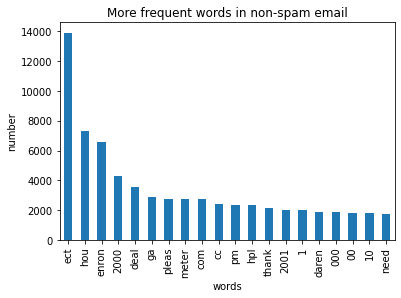

In [343]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam email')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

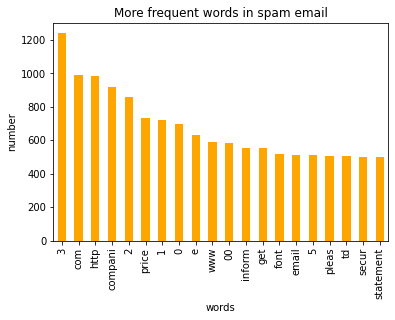

In [344]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam email')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [345]:
f = feature_extraction.text.CountVectorizer()
X = f.fit_transform(data["final_text"])
np.shape(X)

(5171, 42637)

In [346]:
data["label"]=data["label"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], test_size=0.2, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(4136, 42637), (1035, 42637)]


 *Multinomial Naive Bayes* 

In [347]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [348]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.992505,0.974879,0.959044,0.952542
1,0.11001,0.988878,0.971981,0.969283,0.934211
2,0.22001,0.988395,0.971014,0.965870,0.933993
3,0.33001,0.987669,0.970048,0.965870,0.930921
4,0.44001,0.987186,0.970048,0.965870,0.930921
5,0.55001,0.986944,0.972947,0.965870,0.940199
6,0.66001,0.986944,0.973913,0.965870,0.943333
7,0.77001,0.986460,0.973913,0.965870,0.943333
8,0.88001,0.986219,0.973913,0.965870,0.943333
9,0.99001,0.986219,0.974879,0.965870,0.946488


In [349]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             18.260010
Train Accuracy     0.942215
Test Accuracy      0.929469
Test Recall        0.754266
Test Precision     0.995495
Name: 166, dtype: float64

In [350]:
from sklearn.metrics import classification_report
print(classification_report(y_test,bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035



In [351]:
from sklearn.metrics import accuracy_score
Y_predMNBC = bayes.predict(X_test)
acc_valMNBC = accuracy_score(y_test,Y_predMNBC)
predMNBC = acc_valMNBC*100
print("Accuracy score MNBC: %.0f"%predMNBC,"%")

Accuracy score MNBC: 93 %


*Support Vector Machine*

In [352]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [353]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.963285,0.955631,0.918033
1,600.0,1.0,0.963285,0.955631,0.918033
2,700.0,1.0,0.963285,0.955631,0.918033
3,800.0,1.0,0.963285,0.955631,0.918033
4,900.0,1.0,0.963285,0.955631,0.918033
5,1000.0,1.0,0.963285,0.955631,0.918033
6,1100.0,1.0,0.963285,0.955631,0.918033
7,1200.0,1.0,0.963285,0.955631,0.918033
8,1300.0,1.0,0.963285,0.955631,0.918033
9,1400.0,1.0,0.963285,0.955631,0.918033


In [354]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.963285
Test Recall         0.955631
Test Precision      0.918033
Name: 0, dtype: float64

In [355]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       742
           1       0.92      0.96      0.94       293

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.96      1035
weighted avg       0.96      0.96      0.96      1035



In [356]:
from sklearn.metrics import accuracy_score
Y_predSVM = svc.predict(X_test)
acc_valSVM = accuracy_score(y_test,Y_predSVM)
predSVM = acc_valSVM*100
print("Accuracy score SVM: %.0f" %predSVM, "%")

Accuracy score SVM: 96 %


**DEEP LEARNING**

*RNN*

In [357]:
%tensorflow_version 2.x

In [358]:
import tensorflow as tf
import numpy as np

np.random.seed(7)

In [359]:
import pandas as pd

In [360]:
len(data['final_text'])

5171

In [361]:
data.head()

,label,text,new_text,tokenized_text,clean_text,fix_text,stemmed_text,final_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this...","[subject, enron, methanol, meter, 988291, foll...","[enron, methanol, meter, 988291, follow, note,...","[enron, methanol, meter, 988291, follow, note,...",enron methanol meter 988291 follow note gave m...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see...","[subject, hpl, nom, january, 9, 2001, see, att...","[hpl, nom, january, 9, 2001, see, attached, fi...","[hpl, nom, januari, 9, 2001, see, attach, file...",hpl nom januari 9 2001 see attach file hplnol ...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a...","[subject, neon, retreat, ho, ho, ho, around, w...","[neon, retreat, ho, ho, ho, around, wonderful,...","[neon, retreat, ho, ho, ho, around, wonder, ti...",neon retreat ho ho ho around wonder time year ...
3,1,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[photoshop, windows, office, cheap, main, tren...","[photoshop, window, offic, cheap, main, trend,...",photoshop window offic cheap main trend abas d...
4,0,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,...","[subject, indian, springs, deal, book, teco, p...","[indian, springs, deal, book, teco, pvr, reven...","[indian, spring, deal, book, teco, pvr, revenu...",indian spring deal book teco pvr revenu unders...


In [362]:
data['final_text'].head()

0    enron methanol meter 988291 follow note gave m...
1    hpl nom januari 9 2001 see attach file hplnol ...
2    neon retreat ho ho ho around wonder time year ...
3    photoshop window offic cheap main trend abas d...
4    indian spring deal book teco pvr revenu unders...
Name: final_text, dtype: object

In [363]:
data.drop(['text' , 'new_text', 'tokenized_text', 'stemmed_text'],axis=1,inplace=True)
data.head()

,label,clean_text,fix_text,final_text
0,0,"[subject, enron, methanol, meter, 988291, foll...","[enron, methanol, meter, 988291, follow, note,...",enron methanol meter 988291 follow note gave m...
1,0,"[subject, hpl, nom, january, 9, 2001, see, att...","[hpl, nom, january, 9, 2001, see, attached, fi...",hpl nom januari 9 2001 see attach file hplnol ...
2,0,"[subject, neon, retreat, ho, ho, ho, around, w...","[neon, retreat, ho, ho, ho, around, wonderful,...",neon retreat ho ho ho around wonder time year ...
3,1,"[subject, photoshop, windows, office, cheap, m...","[photoshop, windows, office, cheap, main, tren...",photoshop window offic cheap main trend abas d...
4,0,"[subject, indian, springs, deal, book, teco, p...","[indian, springs, deal, book, teco, pvr, reven...",indian spring deal book teco pvr revenu unders...


In [364]:
data['label'].unique()

array([0, 1])

In [365]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 500

tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(data['final_text'].values)
X = tokenizer.texts_to_sequences(data['final_text'].values)
X = pad_sequences(X);

In [366]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(data['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)



input_train shape: (4136, 1481)
input_test shape: (1035, 1481)


In [367]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt

*Simple RNN*

In [370]:
model_RNN = Sequential()
model_RNN.add(Embedding(10000, 32))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(2, activation='sigmoid'))
model_RNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history_RNN = model_RNN.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=512, #sekali proses jln 512
                    validation_split=0.2, #dataset dibagi antara training dan testing (80% buat training 20% buat testing)
                    validation_data=(X_test, Y_test))

Epoch 1/5
7/7 [==============================] - 6s 923ms/step - loss: 0.6824 - acc: 0.5792 - val_loss: 0.6848 - val_acc: 0.5700
Epoch 2/5
7/7 [==============================] - 6s 895ms/step - loss: 0.6540 - acc: 0.7016 - val_loss: 0.6550 - val_acc: 0.7415
Epoch 3/5
7/7 [==============================] - 6s 909ms/step - loss: 0.6265 - acc: 0.8086 - val_loss: 0.6126 - val_acc: 0.7403
Epoch 4/5
7/7 [==============================] - 6s 918ms/step - loss: 0.5917 - acc: 0.7491 - val_loss: 0.5873 - val_acc: 0.7307
Epoch 5/5
7/7 [==============================] - 6s 916ms/step - loss: 0.5636 - acc: 0.7394 - val_loss: 0.5617 - val_acc: 0.7283


In [371]:
loss_RNN, acc_RNN = model_RNN.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f" % (acc_RNN*100), "%")
print("Loss: %.2f" % (loss_RNN*100), "%")

Accuracy: 73.53 %
Loss: 56.11 %


In [372]:
from sklearn.metrics import classification_report
Y_pred = model_RNN.predict(X_test)
print(classification_report(Y_test.argmax(axis=1),Y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       742
           1       0.95      0.07      0.13       293

    accuracy                           0.74      1035
   macro avg       0.84      0.53      0.49      1035
weighted avg       0.79      0.74      0.64      1035



In [373]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
Y_predRNN = model_RNN.predict(X_test)
acc_valRNN = accuracy_score(Y_test.argmax(axis=1),Y_predRNN.argmax(axis=1))
pres = (acc_valRNN*100)
print("Accuracy score RNN: %.0f" %pres, "%")


Accuracy score RNN: 74 %


In [374]:
import pandas as pd

In [375]:
daftarAccurancy = pd.DataFrame({'Number':[1,2,3],
                                'Algorithm':['MNBC','SVM','RNN'],
                                'Accurancy':[predMNBC,predSVM,pres],
                                'Percentage':['%.0f%%' %predMNBC,'%.0f%%' %predSVM,'%.0f%%' %pres]})
daftarAccurancy

,Number,Algorithm,Accurancy,Percentage
0,1,MNBC,92.657005,93%
1,2,SVM,96.328502,96%
2,3,RNN,73.526570,74%


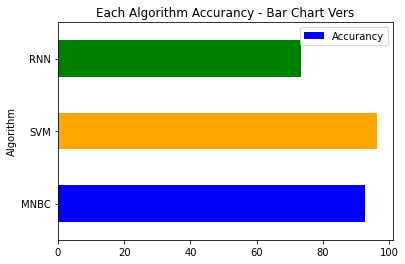

In [376]:
daftarAccurancy.plot.barh(x='Algorithm',y='Accurancy', color= ["blue", "orange", "green"], title='Each Algorithm Accurancy - Bar Chart Vers')
plt.show()
